In [163]:
import io
import os
from os.path import join

from promo import f0_morph
from praatio import audioio
from praatio import dataio
from praatio import praat_scripts
from praatio import pitch_and_intensity

# We need to use absolute paths when using praatEXE
inputPath = os.path.abspath(join('..', 'ProMo-master','examples', 'files'))
outputPath = os.path.abspath(join(inputPath, "pitch_tutorial_output"))
if not os.path.exists(outputPath):
    os.mkdir(outputPath)

########
# STEP 1: Load all the pre-defined parameters

# Pick your poison
praatEXE = r"C:\Praat.exe"  # Windows paths
#praatEXE = "/Applications/Praat.app/Contents/MacOS/Praat"  # Mac paths

# Audio file to manipulate
inputWavFN = "salida.wav"

# Pitch file for manipulation
flatPitchFN = "salida.PitchTier"

# Final output wav file
outputWavFN = "salida_flat_pitch.wav"
minPitch = 50
maxPitch = 140

########
# STEP 2: Create the target pitch contour
# To do this, we need to obtain pitch values at regular intervals
# Generally, you'd extract this information or use a stylized curve
# but here we'll generate an unnaturally flat pitch.  It will be noticably weird.
duration = audioio.getDuration(join(inputPath, inputWavFN))
frequency = 100.0
pitchVal = 100.0
pitchList = [(timeV / frequency, pitchVal) for timeV in range(int(duration * 100))]

targetPitchTier = dataio.PointObject2D(pitchList, dataio.PITCH, 0, duration)
targetPitchTier.save(join(outputPath, flatPitchFN))

########
# STEP 3: Do the resynthesis

praat_scripts.resynthesizePitch(praatEXE,
                                join(inputPath, inputWavFN),
                                join(outputPath, flatPitchFN),
                                join(outputPath, outputWavFN),
                                minPitch, maxPitch)
print("Let's take a look at the output:")


Let's take a look at the output:


In [164]:
displayAudio((("The original audio file:", join(inputPath, inputWavFN)),
              ("The new, resynthesized audio file (yikes!):", join(outputPath, outputWavFN))))

The original audio file:


The new, resynthesized audio file (yikes!):


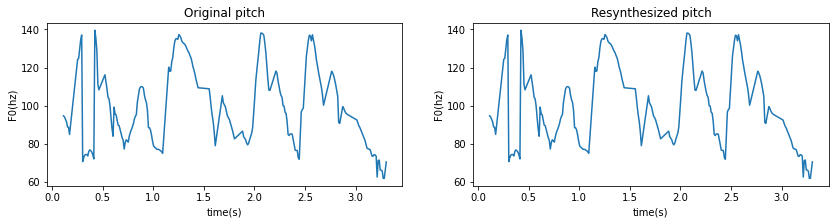

In [165]:
f, plotList = plt.subplots(1, 2, figsize=(14, 3))

x, y = zip(*targetPitchTier.pointList)

mary2PitchFN = "salida.PitchTier"
pitch_and_intensity.extractPitchTier(join(inputPath, inputWavFN),
                                     join(outputPath, mary2PitchFN),
                                     praatEXE, minPitch, maxPitch)

doPlot(plotList[0], 'Original pitch', join(outputPath, mary2PitchFN)) 
doPlot(plotList[1], 'Resynthesized pitch', join(outputPath, flatPitchFN))

In [166]:
# Skipping everything above 'STEP 1' from the previous example

########
# STEP 1: Load all the pre-defined parameters

# Pick your poison
praatEXE = r"C:\Praat.exe"  # Windows paths
#praatEXE = "/Applications/Praat.app/Contents/MacOS/Praat"  # Mac paths

# Audio file to manipulate mary 2
inputWavFN = "salida.wav"

# (*NEW*) Audio file supplying target pitch contour mary 1
targetWavFN = "arg.wav"

# (*NEW*) Pitch file for manipulation mary 1
mary1PitchFN = "arg.PitchTier"

# Final output wav file mary 2 to mary 1
outputWavFN = "salida_to_arg.wav"
minPitch = 50
maxPitch = 130

########
# STEP 2: Create the target pitch contour
# (*NEW*) Extracting pitch from target file
pitch_and_intensity.extractPitchTier(join(inputPath, targetWavFN),
                                     join(outputPath, mary1PitchFN),
                                     praatEXE, minPitch, maxPitch)

########
# STEP 3: Do the resynthesis

praat_scripts.resynthesizePitch(praatEXE,
                                join(inputPath, inputWavFN),
                                join(outputPath, mary1PitchFN),
                                join(outputPath, outputWavFN),
                                minPitch, maxPitch)
print("Let's take a look at the output:")

Let's take a look at the output:


In [167]:
displayAudio((("The original audio file:", join(inputPath, inputWavFN)),
              ("The target audio file:", join(inputPath, targetWavFN)),
              ("The new, resynthesized audio file (still yikes!):", join(outputPath, outputWavFN))))

The original audio file:


The target audio file:


The new, resynthesized audio file (still yikes!):


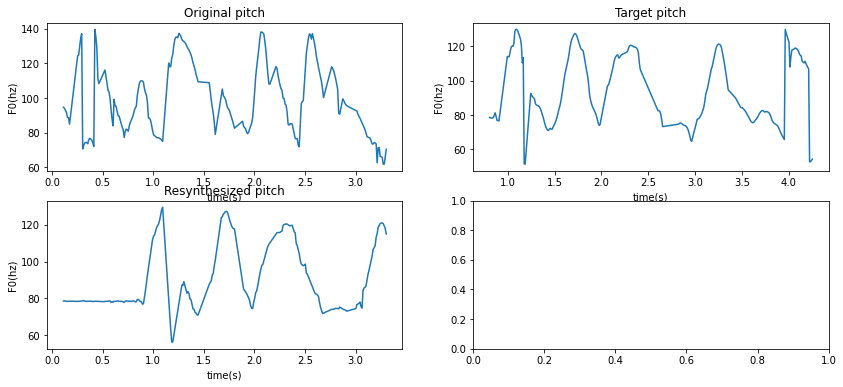

In [168]:
f, plotList = plt.subplots(2, 2, figsize=(14, 6))

resynthesizedPitchFN = "salida_to_arg.TextGrid"
pitch_and_intensity.extractPitchTier(join(outputPath, outputWavFN),
                                     join(outputPath, resynthesizedPitchFN),
                                     praatEXE, minPitch, maxPitch)

doPlot(plotList[0][0], 'Original pitch', join(outputPath, mary2PitchFN)) 
doPlot(plotList[0][1], 'Target pitch', join(outputPath, mary1PitchFN)) 
doPlot(plotList[1][0], 'Resynthesized pitch', join(outputPath, resynthesizedPitchFN)) 

In [169]:
# Skipping everything above 'STEP 1' from the previous example

########
# STEP 1: Load all the pre-defined parameters

######## mary 2 es ESP
# Pick your poison
praatEXE = r"C:\Praat.exe"  # Windows paths
#praatEXE = "/Applications/Praat.app/Contents/MacOS/Praat"  # Mac paths

# Audio file to manipulate mary 2
inputWavFN = "salida.wav"

# Audio file supplying target pitch contour mary 1
targetWavFN = "arg.wav"

# Pitch file for manipulation 
mary1PitchFN = "salida.PitchTier"
mary2PitchFN = "arg.PitchTier"

# Final output wav file mary 2 to mary 1
outputWavFN = "salida_to_arg.wav"
minPitch = 50
maxPitch = 140

# (*NEW*) The list of steps
# A lists of values between 0 and 1.0 where 0 corresponds to 0% morph (all source contour)
# and 1.0 corresponds to 100% morph (all target contour)
# For now, let's go with the simplest possible stepList:
stepList = [1.0, ]

########
# STEP 2: Load pitch data
# Notice that this time we're using extractPitch rather than extractPitchTier.
# The result is the same except the form of the output. extractPitch() returns
# a list of the form [(timeV1, pitchV1), (timeV2, pitchV2), ] whereas
# extractPitchTier() returns
fromPitchTier = pitch_and_intensity.extractPitchTier(join(inputPath, inputWavFN),
                                                     join(outputPath, mary2PitchFN),
                                                     praatEXE, minPitch,
                                                     maxPitch, forceRegenerate=False)

toPitchTier = pitch_and_intensity.extractPitchTier(join(inputPath, targetWavFN),
                                                   join(outputPath, mary1PitchFN),
                                                   praatEXE, minPitch,
                                                   maxPitch, forceRegenerate=False)

########
# STEP 3: Prepare the pitch regions
# (*NEW*) Wrap the pitch data into a list []
# extractPitch() returns a list of pitch data points
# f0 morph expects a list of lists, where each element of the list contains the pitch
# values for one region of the audio data. (e.g. the pitch values in fromPitch[0] would
# get morphed to the pitch values in toPitch[0] and the pitch values in fromPitch[1]
# would get morphed to the pitch values in toPitch[1], etc.)
# In this example, we only have 1 region containing all of our pitch data.  Thus:
fromPitchRegions = [fromPitchTier.pointList, ]
toPitchRegions = [toPitchTier.pointList, ]

########
# STEP 4: Run the morph process
f0_morph.f0Morph(fromWavFN=join(inputPath, inputWavFN),
                 pitchPath=outputPath,
                 stepList=stepList,
                 outputName="salida_to_arg_morph",
                 doPlotPitchSteps=False,
                 fromPitchData=fromPitchRegions,
                 toPitchData=toPitchRegions,
                 outputMinPitch=minPitch,
                 outputMaxPitch=maxPitch,
                 praatEXE=praatEXE)
print("Let's take a look at the output:")

Let's take a look at the output:


In [170]:
displayAudio((("The original audio file:", join(inputPath, inputWavFN)),
              ("The target audio file:", join(inputPath, targetWavFN)),
              ("The new, resynthesized audio file (better, but still yikes!):", join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_morph_1.wav"))))


The original audio file:


The target audio file:


The new, resynthesized audio file (better, but still yikes!):


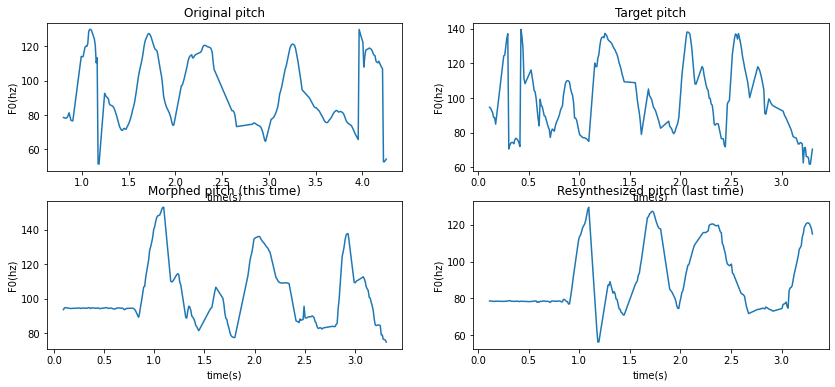

In [171]:
f, plotList = plt.subplots(2, 2, figsize=(14, 6))

pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_morph_1.wav"),
                                     join(outputPath, "salida_to_arg_morph_1.PitchTier"),
                                     praatEXE, minPitch,
                                     maxPitch, forceRegenerate=False)

doPlot(plotList[0][0], 'Original pitch', join(outputPath, mary2PitchFN)) 
doPlot(plotList[0][1], 'Target pitch', join(outputPath, mary1PitchFN)) 
doPlot(plotList[1][0], 'Morphed pitch (this time)', join(outputPath, "salida_to_arg_morph_1.PitchTier"))
doPlot(plotList[1][1], 'Resynthesized pitch (last time)', join(outputPath, resynthesizedPitchFN))

In [172]:
f0_morph.f0Morph(fromWavFN=join(inputPath, inputWavFN),
                 pitchPath=outputPath,
                 stepList=stepList,
                 outputName="salida_to_arg_morph_with_salida_avg",
                 doPlotPitchSteps=False,
                 fromPitchData=fromPitchRegions,
                 toPitchData=toPitchRegions,
                 outputMinPitch=minPitch,
                 outputMaxPitch=maxPitch,
                 praatEXE=praatEXE,
                 keepPitchRange=False,  # (*NEW*)
                 keepAveragePitch=True)   # (*NEW*)

f0_morph.f0Morph(fromWavFN=join(inputPath, inputWavFN),
                 pitchPath=outputPath,
                 stepList=stepList,
                 outputName="salida_to_arg_morph_with_salida_range",
                 doPlotPitchSteps=False,
                 fromPitchData=fromPitchRegions,
                 toPitchData=toPitchRegions,
                 outputMinPitch=minPitch,
                 outputMaxPitch=maxPitch,
                 praatEXE=praatEXE,
                 keepPitchRange=True,  # (*NEW*)
                 keepAveragePitch=False)   # (*NEW*)

f0_morph.f0Morph(fromWavFN=join(inputPath, inputWavFN),
                 pitchPath=outputPath,
                 stepList=stepList,
                 outputName="salida_to_arg_morph_with_salida_all",
                 doPlotPitchSteps=False,
                 fromPitchData=fromPitchRegions,
                 toPitchData=toPitchRegions,
                 outputMinPitch=minPitch,
                 outputMaxPitch=maxPitch,
                 praatEXE=praatEXE,
                 keepPitchRange=True,  # (*NEW*)
                 keepAveragePitch=True)   # (*NEW*)

# And we'll go ahead and extract their pitchTiers now
pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_morph_with_salida_avg_1.wav"),
                                     join(outputPath, "salida_to_arg_morph_with_salida_avg_1.PitchTier"),
                                     praatEXE, minPitch,
                                     maxPitch, forceRegenerate=True)
pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_morph_with_salida_range_1.wav"),
                                     join(outputPath, "salida_to_arg_morph_with_salida_range_1.PitchTier"),
                                     praatEXE, minPitch,
                                     maxPitch, forceRegenerate=True)
pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_morph_with_salida_all_1.wav"),
                                     join(outputPath, "salida_to_arg_morph_with_salida_all_1.PitchTier"),
                                     praatEXE, minPitch,
                                     maxPitch, forceRegenerate=True)
print("Let's take a look at the output:")

Let's take a look at the output:


In [173]:
displayAudio((
              ("The original audio file:", join(inputPath, inputWavFN)),
              ("The target audio file:", join(inputPath, targetWavFN)),
              ("The morphed audio from last time:", join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_morph_1.wav")),
              ("With source average pitch:", join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_morph_with_salida_avg_1.wav")),
              ("With source range:", join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_morph_with_salida_range_1.wav")),
              ("With both source average pitch and range:", join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_morph_with_salida_all_1.wav")),
              ))

The original audio file:


The target audio file:


The morphed audio from last time:


With source average pitch:


With source range:


With both source average pitch and range:


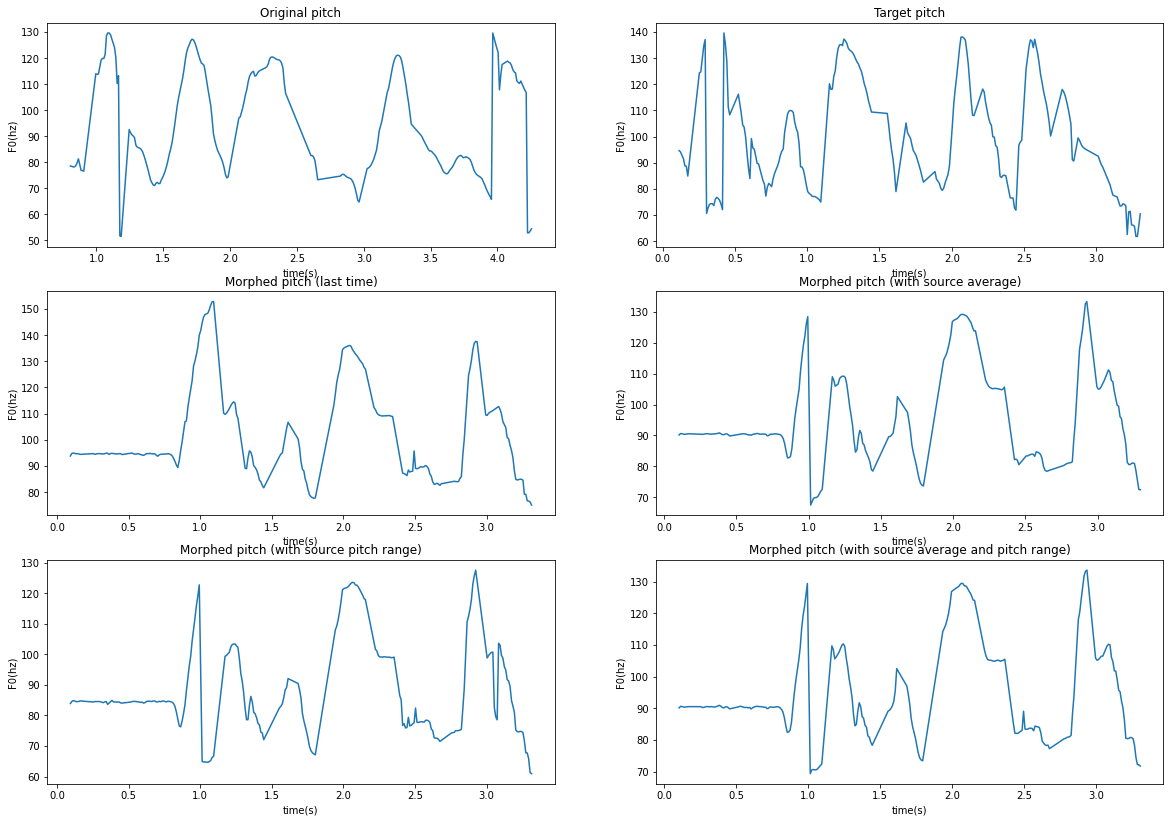

In [175]:
f, plotList = plt.subplots(3, 2, figsize=(20, 14))

doPlot(plotList[0][0], 'Original pitch', join(outputPath, mary2PitchFN)) 
doPlot(plotList[0][1], 'Target pitch', join(outputPath, mary1PitchFN)) 
doPlot(plotList[1][0], 'Morphed pitch (last time)', join(outputPath, "salida_to_arg_morph_1.PitchTier"))
doPlot(plotList[1][1], 'Morphed pitch (with source average)', join(outputPath, "salida_to_arg_morph_with_salida_avg_1.PitchTier"))
doPlot(plotList[2][0], 'Morphed pitch (with source pitch range)', join(outputPath, "salida_to_arg_morph_with_salida_range_1.PitchTier"))
doPlot(plotList[2][1], 'Morphed pitch (with source average and pitch range)', join(outputPath, "salida_to_arg_morph_with_salida_all_1.PitchTier"))


In [176]:
fromPitchRegions = [fromPitchTier.pointList, ]
toPitchRegions = [toPitchTier.pointList, ]
halfLen = int(len(fromPitchRegions)/2)
fromPitchRegions = [fromPitchTier.pointList[:halfLen], fromPitchTier.pointList[halfLen:]]
                    
halfLen = int(len(toPitchRegions)/2)                    
toPitchRegions = [toPitchTier.pointList[:halfLen], toPitchTier.pointList[halfLen:]]


In [177]:
# This is a complete example that don't require the earlier
# segments of this tutorial to run.
import io
import os
from os.path import join

from promo import f0_morph
from praatio import audioio
from praatio import dataio
from praatio import praat_scripts
from praatio import pitch_and_intensity

# We need to use absolute paths when using praatEXE
inputPath = os.path.abspath(join('..', 'ProMo-master','examples', 'files'))
outputPath = os.path.abspath(join(inputPath, "pitch_tutorial_output"))
if not os.path.exists(outputPath):
    os.mkdir(outputPath)

########
# STEP 1: Load all the pre-defined parameters

# Pick your poison
praatEXE = r"C:\Praat.exe"  # Windows paths
#praatEXE = "/Applications/Praat.app/Contents/MacOS/Praat"  # Mac paths
minPitch = 50
maxPitch = 350
stepList = [1.0, ]

########
# STEP 2: Load pitch data
fromPitchTier = pitch_and_intensity.extractPitchTier(join(inputPath, "salida.wav"),
                                                     join(outputPath, "salida.PitchTier"),
                                                     praatEXE, minPitch,
                                                     maxPitch, forceRegenerate=True)

toPitchTier = pitch_and_intensity.extractPitchTier(join(inputPath, "arg.wav"),
                                                   join(outputPath, "arg.PitchTier"),
                                                   praatEXE, minPitch,
                                                   maxPitch, forceRegenerate=True)

########
# STEP 3: Prepare the pitch regions
# (*NEW*) -- using getPitchForIntervals()
tierName = "utterances"
fromTGFN = join(inputPath, "oranges.TextGrid")
toTGFN = join(inputPath, "pickles.TextGrid")
fromPitchRegions = f0_morph.getPitchForIntervals(fromPitchTier.pointList, fromTGFN, tierName)
toPitchRegions = f0_morph.getPitchForIntervals(toPitchTier.pointList, toTGFN, tierName)

########
# STEP 4: Run the morph process
f0_morph.f0Morph(fromWavFN=join(inputPath, "salida.wav"),
                 pitchPath=outputPath,
                 stepList=stepList,
                 outputName="salida_to_arg_with_textgrids",
                 doPlotPitchSteps=False,
                 fromPitchData=fromPitchRegions,
                 toPitchData=toPitchRegions,
                 outputMinPitch=minPitch,
                 outputMaxPitch=maxPitch,
                 praatEXE=praatEXE,
                 keepPitchRange=False,
                 keepAveragePitch=False,
                 sourcePitchDataList=fromPitchTier.pointList)  
                # (*NEW*) If you aren't manipulating the whole pitch contour, specify the source
                # pitch contour with *sourcePitchDataList* and it will sample from any regions
                # not in fromPitchData
                

# And we'll go ahead and extract the pitchTier now
pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_with_textgrids_1.wav"),
                                     join(outputPath, "salida_to_arg_with_textgrids_1.PitchTier"),
                                     praatEXE, minPitch,
                                     maxPitch, forceRegenerate=True)


# Let's also morph the files without a textgrid for comparison
fromPitchRegions = [fromPitchTier.pointList, ]
toPitchRegions = [toPitchTier.pointList, ]
f0_morph.f0Morph(fromWavFN=join(inputPath, "salida.wav"),
                 pitchPath=outputPath,
                 stepList=stepList,
                 outputName="salida_to_arg",
                 doPlotPitchSteps=False,
                 fromPitchData=fromPitchRegions,
                 toPitchData=toPitchRegions,
                 outputMinPitch=minPitch,
                 outputMaxPitch=maxPitch,
                 praatEXE=praatEXE,
                 keepPitchRange=False,
                 keepAveragePitch=False)

pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_1.wav"),
                                     join(outputPath, "salida_to_arg_1.PitchTier"),
                                     praatEXE, minPitch,
                                     maxPitch, forceRegenerate=True)
print("Let's take a look at the output:")


Let's take a look at the output:


In [178]:
displayAudio((
              ("The original audio file:", join(inputPath, "salida.wav")),
              ("The target audio file:", join(inputPath, "arg.wav")),
              ("Morphed without textgrids:", join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_1.wav")),
              ("Morphed with textgrids:", join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_with_textgrids_1.wav")),
              ))

The original audio file:


The target audio file:


Morphed without textgrids:


Morphed with textgrids:


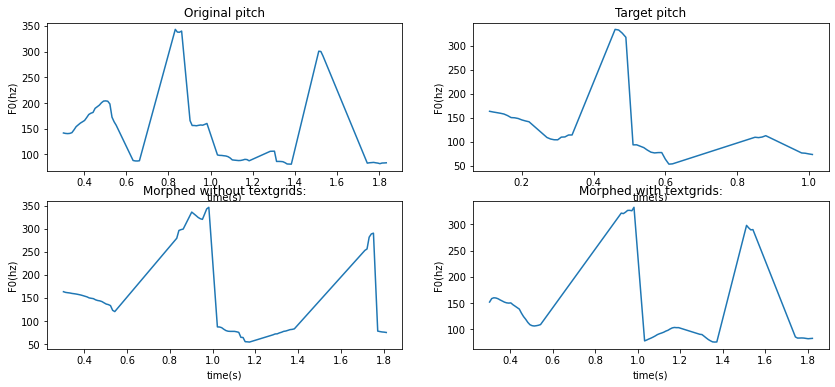

In [156]:
f, plotList = plt.subplots(2, 2, figsize=(14, 6))

doPlot(plotList[0][0], 'Original pitch', join(outputPath, "oranges.PitchTier")) 
doPlot(plotList[0][1], 'Target pitch', join(outputPath, "pickles.PitchTier")) 
doPlot(plotList[1][0], 'Morphed without textgrids:', join(outputPath, "oranges_to_pickles_1.PitchTier"))
doPlot(plotList[1][1], 'Morphed with textgrids:', join(outputPath, "oranges_to_pickles_with_textgrids_1.PitchTier"))

In [157]:
stepList = [1.0, ]


In [159]:
# We'll use the same setup as in the previous example, which used textgrids
stepList = [0.0, 0.33, 0.66, 1.0]
minPitch = 75
maxPitch = 350


fromPitchTier = pitch_and_intensity.extractPitchTier(join(inputPath, "salida.wav"),
                                                     join(outputPath, "salida.PitchTier"),
                                                     praatEXE, minPitch,
                                                     maxPitch, forceRegenerate=True)

toPitchTier = pitch_and_intensity.extractPitchTier(join(inputPath, "arg.wav"),
                                                   join(outputPath, "arg.PitchTier"),
                                                   praatEXE, minPitch,
                                                   maxPitch, forceRegenerate=True)

tierName = "words"
fromTGFN = join(inputPath, "carrots1.TextGrid")
toTGFN = join(inputPath, "carrots2.TextGrid")
fromPitchRegions = f0_morph.getPitchForIntervals(fromPitchTier.pointList, fromTGFN, tierName)
toPitchRegions = f0_morph.getPitchForIntervals(toPitchTier.pointList, toTGFN, tierName)

########
# STEP 4: Run the morph process
f0_morph.f0Morph(fromWavFN=join(inputPath, "salida.wav"),
                 pitchPath=outputPath,
                 stepList=stepList,
                 outputName="salida_to_arg_morph",
                 doPlotPitchSteps=False,
                 fromPitchData=fromPitchRegions,
                 toPitchData=toPitchRegions,
                 outputMinPitch=minPitch,
                 outputMaxPitch=maxPitch,
                 praatEXE=praatEXE,
                 keepPitchRange=False,
                 keepAveragePitch=False)

# And we'll go ahead and extract the pitchTier now
pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_morph_0.wav"),
                                     join(outputPath, "salida_to_arg_0.PitchTier"),
                                     praatEXE, minPitch,
                                     maxPitch, forceRegenerate=True)

pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_morph_0.33.wav"),
                                     join(outputPath, "salida_to_arg_0.33.PitchTier"),
                                     praatEXE, minPitch,
                                     maxPitch, forceRegenerate=True)

pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_morph_0.66.wav"),
                                     join(outputPath, "salida_to_arg_0.66.PitchTier"),
                                     praatEXE, minPitch,
                                     maxPitch, forceRegenerate=True)

pitch_and_intensity.extractPitchTier(join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_morph_1.wav"),
                                     join(outputPath, "salida_to_arg_1.PitchTier"),
                                     praatEXE, minPitch,
                                     maxPitch, forceRegenerate=True)

print("Let's take a look at the output:")

Let's take a look at the output:


In [161]:
displayAudio((
              ("The original audio file:", join(inputPath, "salida.wav")),
              ("The target audio file:", join(inputPath, "arg.wav")),
              ("100% source, 0% target:", join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_morph_0.wav")),
              ("60% source, 30% target:", join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_morph_0.33.wav")),
              ("30% source, 60% target:", join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_morph_0.66.wav")),
              ("0% source, 100% target:", join(outputPath, "f0_resynthesized_wavs", "salida_to_arg_morph_1.wav")),
              ))


The original audio file:


The target audio file:


100% source, 0% target:


60% source, 30% target:


30% source, 60% target:


0% source, 100% target:


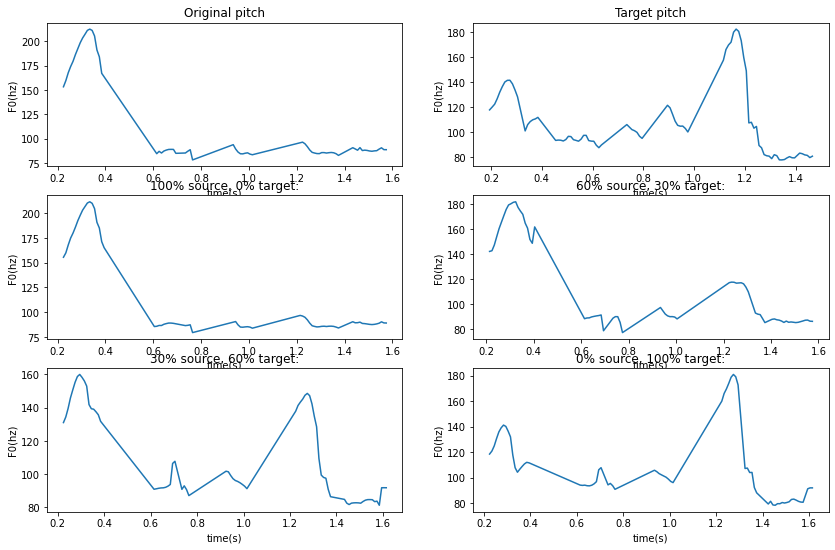

In [162]:
f, plotList = plt.subplots(3, 2, figsize=(14, 9))

doPlot(plotList[0][0], 'Original pitch', join(outputPath, "carrots1.PitchTier")) 
doPlot(plotList[0][1], 'Target pitch', join(outputPath, "carrots2.PitchTier")) 
doPlot(plotList[1][0], '100% source, 0% target:', join(outputPath, "carrots1_to_carrots2_morph_0.PitchTier"))
doPlot(plotList[1][1], '60% source, 30% target:', join(outputPath, "carrots1_to_carrots2_morph_0.33.PitchTier"))
doPlot(plotList[2][0], '30% source, 60% target:', join(outputPath, "carrots1_to_carrots2_morph_0.66.PitchTier"))
doPlot(plotList[2][1], '0% source, 100% target:', join(outputPath, "carrots1_to_carrots2_morph_1.PitchTier"))